In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [63]:
UCB_df = pd.read_csv('UCB_binding_all_min_values_matrix.csv')
PI_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/PI_UCB_RBF_Binding.csv')
RANDOM_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/Random_binding_all_min_values_matrix.csv')


UCB_folding_df = pd.read_csv('UCB_folding_all_min_values_matrix.csv')
PI_folding_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/UCB_alt_Folding.csv')
RANDOM_folding_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/Random_folding_all_min_values_matrix.csv')

PI_Alt_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/PI_UCB_alt_Binding.csv')
PI_Alt_folding_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/PI_UCB_alt_Folding.csv')
UCB_alt_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/UCB_alt_Binding.csv')
UCB_alt_folding_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/UCB_folding_all_min_values_matrix.csv')

global_min_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/Averaged_data/08-03_bdE_scores.csv')
min_binding = global_min_df['Energy Score'].min()
min_folding = global_min_df['Folded Energy Delta'].min()

In [64]:
print(UCB_df.head())

  Unnamed: 0   Trial 1   Trial 2   Trial 3   Trial 4   Trial 5   Trial 6  \
0      Run 0 -0.188095 -0.188095 -0.188095 -0.188095 -0.188095 -0.188095   
1      Run 1 -0.188095 -0.188095 -0.387228 -0.387228 -0.387228 -0.387228   
2      Run 2 -0.188095 -0.188095 -0.335160 -0.335160 -0.335160 -0.335160   
3      Run 3 -0.188095 -0.188095 -0.362010 -0.362010 -0.362010 -0.362010   
4      Run 4 -0.188095 -0.188095 -0.366378 -0.366378 -0.366378 -0.366378   

    Trial 7   Trial 8   Trial 9  ...  Trial 11  Trial 12  Trial 13  Trial 14  \
0 -0.188095 -0.414641 -0.414641  ... -0.414641 -0.414641 -0.414641 -0.414641   
1 -0.387228 -0.387228 -0.387228  ... -0.387228 -0.387228 -0.387228 -0.387228   
2 -0.335160 -0.335160 -0.335160  ... -0.335160 -0.335160 -0.335160 -0.335160   
3 -0.362010 -0.362010 -0.362010  ... -0.362010 -0.362010 -0.362010 -0.362010   
4 -0.366378 -0.366378 -0.366378  ... -0.366378 -0.366378 -0.366378 -0.366378   

   Trial 15  Trial 16  Trial 17  Trial 18  Trial 19  Trial 20 

In [65]:
def medians_per_trial(df):
    """
    Calculate the median of each trial across all runs.
    """
    df.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the index column if it exists
    median_array = []
    for i in range(df.shape[0]):
        medians = []
        for i in range(df.shape[1]):
            median_value = df.iloc[:, i].median()
            medians.append(median_value)
        median_array.append(medians)
    return pd.DataFrame(median_array, columns=df.columns)
        


In [66]:
def bot_percentile_per_trial(df):
    """
    Calculate the 25th percentile of each trial across all runs.
    """
    
    # df.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the index column if it exists
    percentile_array = []
    for i in range(df.shape[0]):
        percentiles = []
        for i in range(df.shape[1]):
            percentile_value = df.iloc[:, i].quantile(0.25)
            percentiles.append(percentile_value)
        percentile_array.append(percentiles)
    return pd.DataFrame(percentile_array, columns=df.columns)

In [67]:
def top_percentile_per_trial(df):
    """
    Calculate the 75th percentile of each trial across all runs.
    """
    # df.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the index column if it exists
    percentile_array = []
    for i in range(df.shape[0]):
        percentiles = []
        for i in range(df.shape[1]):
            percentile_value = df.iloc[:, i].quantile(0.75)
            percentiles.append(percentile_value)
        percentile_array.append(percentiles)
    return pd.DataFrame(percentile_array, columns=df.columns)

In [68]:
ucb_m = medians_per_trial(UCB_df)
pi_m = medians_per_trial(PI_df)
random_m = medians_per_trial(RANDOM_df)

In [69]:
ucb_25 = bot_percentile_per_trial(UCB_df)
pi_25 = bot_percentile_per_trial(PI_df)
random_25 = bot_percentile_per_trial(RANDOM_df)
ucb_75 = top_percentile_per_trial(UCB_df)
pi_75 = top_percentile_per_trial(PI_df)
random_75 = top_percentile_per_trial(RANDOM_df)

In [70]:
ucbf_m = medians_per_trial(UCB_folding_df)
pi_f_m = medians_per_trial(PI_folding_df)
random_f_m = medians_per_trial(RANDOM_folding_df)
ucbf_25 = bot_percentile_per_trial(UCB_folding_df)
pi_f_25 = bot_percentile_per_trial(PI_folding_df)
random_f_25 = bot_percentile_per_trial(RANDOM_folding_df)
ucbf_75 = top_percentile_per_trial(UCB_folding_df)
pi_f_75 = top_percentile_per_trial(PI_folding_df)
random_f_75 = top_percentile_per_trial(RANDOM_folding_df)


In [71]:
pi_alt_m = medians_per_trial(PI_Alt_df)
ucb_alt_m = medians_per_trial(UCB_alt_df)
pi_alt_f_m = medians_per_trial(PI_Alt_folding_df)
ucb_alt_f_m = medians_per_trial(UCB_alt_folding_df) 
pi_alt_25 = bot_percentile_per_trial(PI_Alt_df)
ucb_alt_25 = bot_percentile_per_trial(UCB_alt_df)
pi_alt_f_25 = bot_percentile_per_trial(PI_Alt_folding_df)
ucb_alt_f_25 = bot_percentile_per_trial(UCB_alt_folding_df)
pi_alt_75 = top_percentile_per_trial(PI_Alt_df)
ucb_alt_75 = top_percentile_per_trial(UCB_alt_df)
pi_alt_f_75 = top_percentile_per_trial(PI_Alt_folding_df)
ucb_alt_f_75 = top_percentile_per_trial(UCB_alt_folding_df)

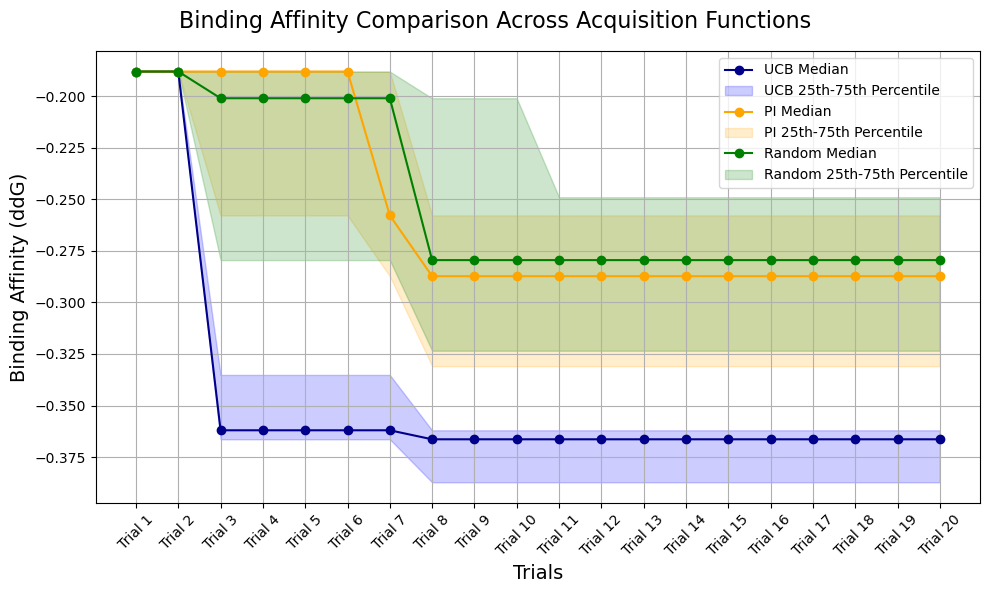

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Binding Affinity Comparison Across Acquisition Functions', fontsize=16)
ax.set_xlabel('Trials', fontsize=14)
ax.set_ylabel('Binding Affinity (ddG)', fontsize=14)
ax.plot(ucb_m.mean(), label='UCB Median', color='darkblue', marker='o')
ax.fill_between(range(len(ucb_m.mean())), ucb_25.mean(), ucb_75.mean(), color='blue', alpha=0.2, label='UCB 25th-75th Percentile')
ax.plot(pi_m.mean(), label='PI Median', color='orange', marker='o')
ax.fill_between(range(len(pi_m.mean())), pi_25.mean(), pi_75.mean(), color='orange', alpha=0.2, label='PI 25th-75th Percentile')
ax.plot(random_m.mean(), label='Random Median', color='green', marker='o')
ax.fill_between(range(len(random_m.mean())), random_25.mean(), random_75.mean(), color='green', alpha=0.2, label='Random 25th-75th Percentile')
ax.legend()

ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('binding_affinity_comparison.png')
plt.show()

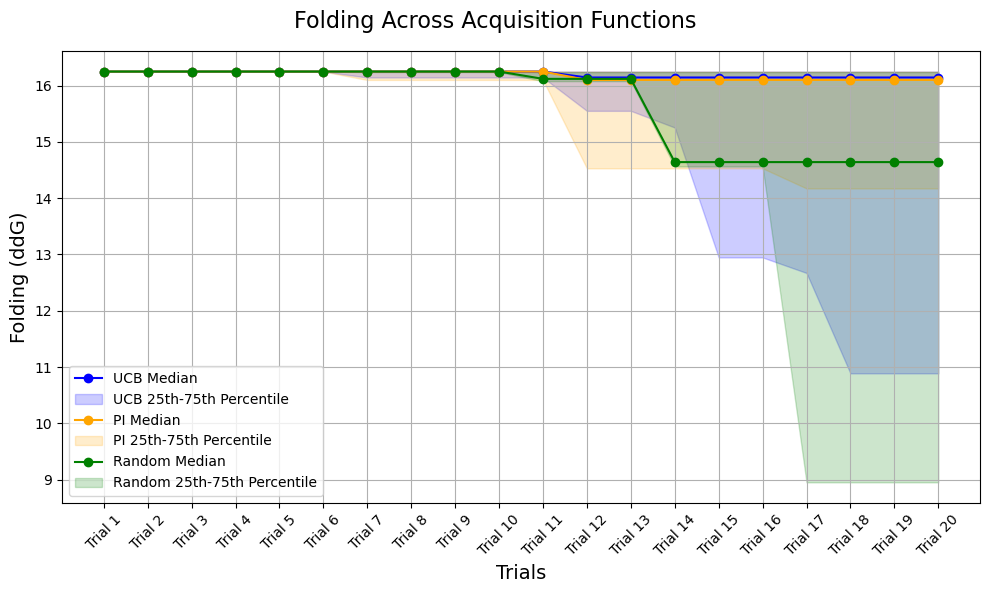

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Folding Across Acquisition Functions', fontsize=16)
ax.set_xlabel('Trials', fontsize=14)
ax.set_ylabel('Folding (ddG)', fontsize=14)
ax.plot(ucbf_m.mean(), label='UCB Median', color='blue', marker='o')
ax.fill_between(range(len(ucbf_m.mean())), ucbf_25.mean(), ucbf_75.mean(), color='blue', alpha=0.2, label='UCB 25th-75th Percentile')
ax.plot(pi_f_m.mean(), label='PI Median', color='orange', marker='o')
ax.fill_between(range(len(pi_f_m.mean())), pi_f_25.mean(), pi_f_75.mean(), color='orange', alpha=0.2, label='PI 25th-75th Percentile')
ax.plot(random_f_m.mean(), label='Random Median', color='green', marker='o')
ax.fill_between(range(len(random_f_m.mean())), random_f_25.mean(), random_f_75.mean(), color='green', alpha=0.2, label='Random 25th-75th Percentile')
ax.legend() 
ax.legend()

ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('folding_affinity_comparison.png')
plt.show()                   

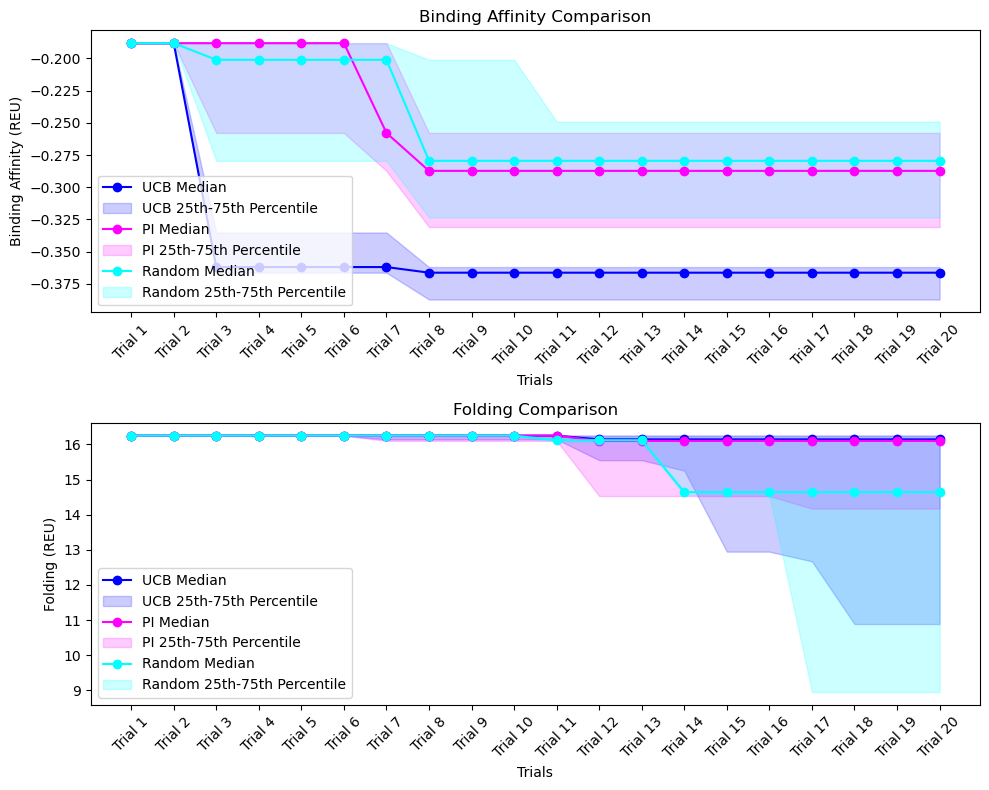

In [74]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# Plotting binding affinity

ax[0].plot(ucb_m.mean(), label='UCB Median', color='blue', marker='o')
ax[0].fill_between(range(len(ucb_m.mean())), ucb_25.mean(), ucb_75.mean(), color='blue', alpha=0.2, label='UCB 25th-75th Percentile')
ax[0].plot(pi_m.mean(), label='PI Median', color='magenta', marker='o')
ax[0].fill_between(range(len(pi_m.mean())), pi_25.mean(), pi_75.mean(), color='magenta', alpha=0.2, label='PI 25th-75th Percentile')
ax[0].plot(random_m.mean(), label='Random Median', color='cyan', marker='o')
ax[0].fill_between(range(len(random_m.mean())), random_25.mean(), random_75.mean(), color='cyan', alpha=0.2, label='Random 25th-75th Percentile')

# ax[0].legend()
ax[0].set_title('Binding Affinity Comparison')
ax[0].set_xlabel('Trials')
ax[0].set_ylabel('Binding Affinity (REU)')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0]
ax[0].legend()  
# Plotting folding
ax[1].plot(ucbf_m.mean(), label='UCB Median', color='blue', marker='o')
ax[1].fill_between(range(len(ucbf_m.mean())), ucbf_25.mean(), ucbf_75.mean(), color='blue', alpha=0.2, label='UCB 25th-75th Percentile')
ax[1].plot(pi_f_m.mean(), label='PI Median', color='magenta', marker='o')
ax[1].fill_between(range(len(pi_f_m.mean())), pi_f_25.mean(), pi_f_75.mean(), color='magenta', alpha=0.2, label='PI 25th-75th Percentile')
ax[1].plot(random_f_m.mean(), label='Random Median', color='cyan', marker='o')
ax[1].fill_between(range(len(random_f_m.mean())), random_f_25.mean(), random_f_75.mean(), color='cyan', alpha=0.2, label='Random 25th-75th Percentile')
ax[1].set_title('Folding Comparison')
ax[1].set_xlabel('Trials')
ax[1].set_ylabel('Folding (REU)')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].legend()
plt.tight_layout()
plt.savefig('binding_and_folding_comparison.png')

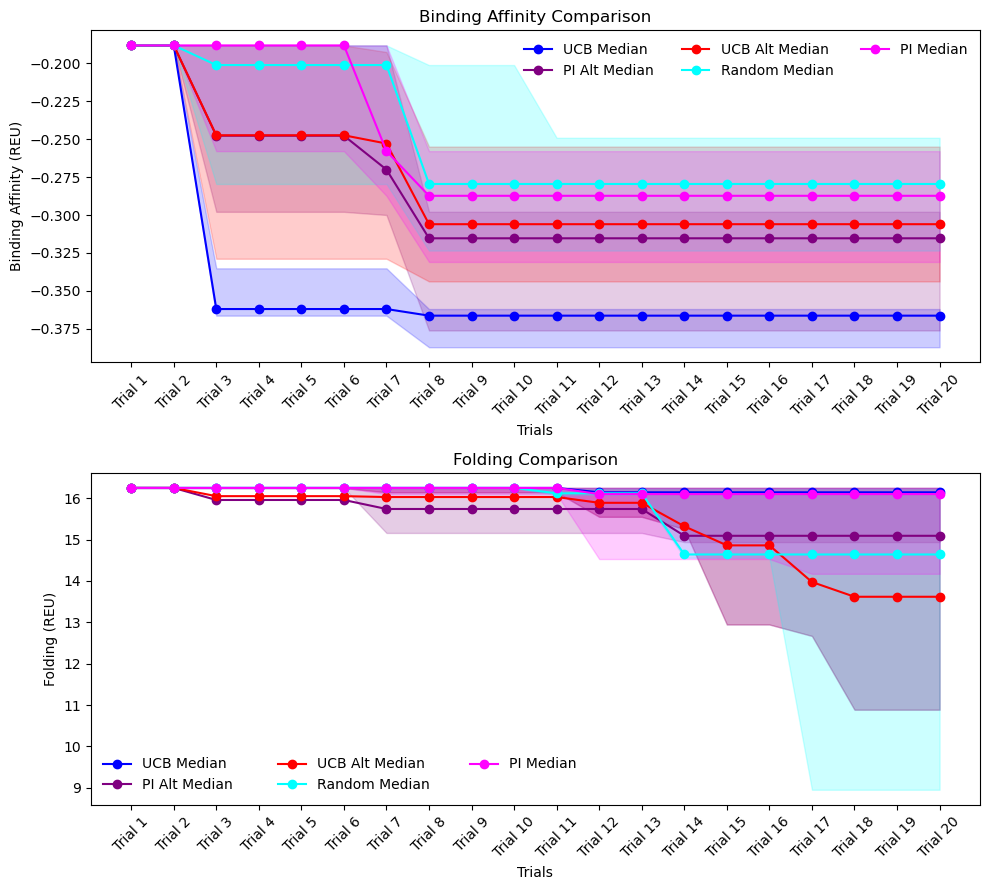

In [96]:
fig, ax = plt.subplots(2, 1, figsize=(10, 9
                                      ))
# Plotting binding
ax[0].plot(ucb_m.mean(), label='UCB Median', color='blue', marker='o')
ax[0].fill_between(range(len(ucb_m.mean())), ucb_25.mean(), ucb_75.mean(), color='blue', alpha=0.2)
ax[0].plot(PI_Alt_df.mean(), label='PI Alt Median', color='purple', marker='o')
ax[0].fill_between(range(len(PI_Alt_df.mean())), PI_Alt_df.quantile(0.25), PI_Alt_df.quantile(0.75), color='purple', alpha=0.2)
ax[0].plot(UCB_alt_df.mean(), label='UCB Alt Median', color='red', marker='o')
ax[0].fill_between(range(len(UCB_alt_df.mean())), UCB_alt_df.quantile(0.25), UCB_alt_df.quantile(0.75), color='red', alpha=0.2)
ax[0].plot(random_m.mean(), label='Random Median', color='cyan', marker='o')
ax[0].fill_between(range(len(random_m.mean())), random_25.mean(), random_75.mean(), color='cyan', alpha=0.2)
ax[0].plot(pi_m.mean(), label='PI Median', color='magenta', marker='o')
ax[0].fill_between(range(len(pi_m.mean())), pi_25.mean(), pi_75.mean(), color='magenta', alpha=0.2)
# ax[0].axhline(y=min_binding, color='black', linestyle='--', label='Global Min Binding')
ax[0].legend(loc = 'upper right', ncol = 3, frameon=False)
ax[0].set_title('Binding Affinity Comparison')
ax[0].set_xlabel('Trials')
ax[0].set_ylabel('Binding Affinity (REU)')
ax[0].tick_params(axis='x', labelrotation=45)   

# Plotting folding
ax[1].plot(ucbf_m.mean(), label='UCB Median', color='blue', marker='o')
ax[1].fill_between(range(len(ucbf_m.mean())), ucbf_25.mean(), ucbf_75.mean(), color='blue', alpha   =0.2)
ax[1].plot(PI_Alt_folding_df.mean(), label='PI Alt Median    ', color='purple', marker='o')    
ax[1].fill_between(range(len(PI_Alt_folding_df.mean())), PI_Alt_folding_df.quantile(0.25), PI_Alt_folding_df.quantile(0.75), color='purple', alpha=0.2)
ax[1].plot(UCB_alt_folding_df.mean(), label='UCB Alt Median    ', color='red', marker='o')    
ax[1].fill_between(range(len(UCB_alt_folding_df.mean())), UCB_alt_folding_df.quantile(0.25), UCB_alt_folding_df.quantile(0.75), color='red', alpha=0.2)
ax[1].plot(random_f_m.mean(), label='Random Median', color='cyan', marker='o')
ax[1].fill_between(range(len(random_f_m.mean())), random_f_25.mean(), random_f_75.mean(), color='cyan', alpha=0.2)
ax[1].plot(pi_f_m.mean(), label='PI Median', color='magenta', marker='o')
ax[1].fill_between(range(len(pi_f_m.mean())), pi_f_25.mean(), pi_f_75.mean(), color='magenta', alpha=0.2)
# ax[1].axhline(y=min_folding, color='black', linestyle='--', label='Global Min Folding')
ax[1].set_title('Folding Comparison')
ax[1].set_xlabel('Trials')
ax[1].set_ylabel('Folding (REU)')
ax[1].tick_params(axis='x', labelrotation=45)   
ax[1].legend(
    loc="lower left",
    ncol=3, # center at the bottom
    frameon=False
)
plt.tight_layout()
plt.savefig('binding_and_folding_comparison_alt.png')


In [80]:
U_alt_ucb_fold_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_UCB_alt_Folding.csv')
U_alt_ucb_bind_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_UCB_alt_Binding.csv')
U_alt_pi_fold_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_PI_UCB_alt_Folding.csv')
U_alt_pi_bind_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_PI_UCB_alt_Binding.csv')
U_ucb_bind_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_UCB_Binding.csv')
U_ucb_fold_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_UCB_Folding.csv')
U_pi_fold_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_PI_UCB_Folding.csv')
U_pi_bind_df = pd.read_csv('/Users/nathanphan/Desktop/Projects/ncPPI/Benchmarking/AcqFunctions/U_PI_UCB_Binding.csv')


In [82]:
u_ucb_m = medians_per_trial(U_ucb_bind_df)
u_ucb_25 = bot_percentile_per_trial(U_ucb_bind_df)
u_ucb_75 = top_percentile_per_trial(U_ucb_bind_df)
u_ucb_f_m = medians_per_trial(U_ucb_fold_df)
u_ucb_f_25 = bot_percentile_per_trial(U_ucb_fold_df)
u_ucb_f_75 = top_percentile_per_trial(U_ucb_fold_df)
u_pi_m = medians_per_trial(U_pi_bind_df)
u_pi_25 = bot_percentile_per_trial(U_pi_bind_df)
u_pi_75 = top_percentile_per_trial(U_pi_bind_df)
u_pi_f_m = medians_per_trial(U_pi_fold_df)
u_pi_f_25 = bot_percentile_per_trial(U_pi_fold_df)
u_pi_f_75 = top_percentile_per_trial(U_pi_fold_df)
u_alt_ucb_m = medians_per_trial(U_alt_ucb_bind_df)
u_alt_ucb_25 = bot_percentile_per_trial(U_alt_ucb_bind_df)
u_alt_ucb_75 = top_percentile_per_trial(U_alt_ucb_bind_df)
u_alt_ucb_f_m = medians_per_trial(U_alt_ucb_fold_df)
u_alt_ucb_f_25 = bot_percentile_per_trial(U_alt_ucb_fold_df)
u_alt_ucb_f_75 = top_percentile_per_trial(U_alt_ucb_fold_df)
u_alt_pi_m = medians_per_trial(U_alt_pi_bind_df)
u_alt_pi_25 = bot_percentile_per_trial(U_alt_pi_bind_df)
u_alt_pi_75 = top_percentile_per_trial(U_alt_pi_bind_df)
u_alt_pi_f_m = medians_per_trial(U_alt_pi_fold_df)
u_alt_pi_f_25 = bot_percentile_per_trial(U_alt_pi_fold_df)
u_alt_pi_f_75 = top_percentile_per_trial(U_alt_pi_fold_df)  

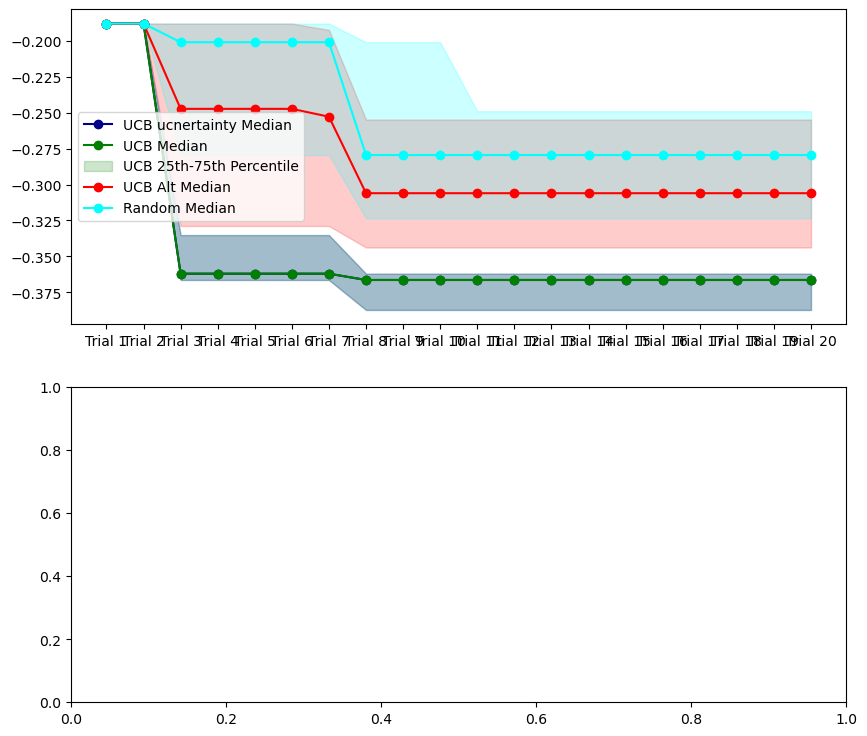

In [94]:
fig, ax = plt.subplots(2, 1, figsize=(10, 9))
# Plotting binding
ax[0].plot(u_ucb_m.mean(), label='UCB ucnertainty Median', color='darkblue', marker='o')
ax[0].fill_between(range(len(u_ucb_m.mean())), u_ucb_25.mean(), u_ucb_75.mean(), color='blue', alpha=0.2)       
ax[0].plot(ucb_m.mean(), label='UCB Median', color='green', marker='o')
ax[0].fill_between(range(len(ucb_m.mean())), ucb_25.mean(), ucb_75.mean(), color='green', alpha=0.2, label='UCB 25th-75th Percentile')
# ax[0].plot(u_alt_ucb_m.mean(), label='UCB alt Median', color='blue', marker='o')
# ax[0].fill_between(range(len(u_alt_ucb_m.mean())), u_alt_ucb_25.mean(), u_alt_ucb_75.mean(), color='blue', alpha=0.2)       
# ax[0].plot(u_pi_m.mean(), label='PI uncertainty Median', color='darkorange', marker='o')
# ax[0].fill_between(range(len(u_pi_m.mean())), u_pi_25.mean(), u_pi_75.mean(), color='orange', alpha=0.2)       
# ax[0].plot(u_alt_pi_m.mean(), label='PI alt Median', color='orange', marker='o')
# ax[0].fill_between(range(len(u_alt_pi_m.mean())), u_alt_pi_25.mean(), u_alt_pi_75.mean(), color='orange', alpha=0.2)  
ax[0].plot(UCB_alt_df.mean(), label='UCB Alt Median', color='red', marker='o')
ax[0].fill_between(range(len(UCB_alt_df.mean())), UCB_alt_df.quantile(0.25), UCB_alt_df.quantile(0.75), color='red', alpha=0.2)     
ax[0].plot(random_m.mean(), label='Random Median', color='cyan', marker='o') 
ax[0].fill_between(range(len(random_m.mean())), random_25.mean(), random_75.mean(), color='cyan', alpha=0.2)       
# ax[0].plot(UCB_alt_df.mean(), label='UCB Alt Median', color='red', marker='o')
# ax[0].fill_between(range(len(UCB_alt_df.mean())), UCB_alt_df.quantile(0.25), UCB_alt_df.quantile(0.75), color='red', alpha=0.2)
ax[0].legend()


